In [2]:
import numpy as np
import scipy as sp
from scipy.stats import gamma
import matplotlib.pyplot as plt
import math

Question 1: 
On cherche $\pi(\lambda|X=x)$, soit la loi à posteriori, afin de déduire f(x). La loi à posteriori est égal à la loi à priori multipliée par la vraisemblance, divisée par une constante f(x):
$$\pi(\lambda|X=x) = \frac{f(x|\Lambda=\lambda)\pi(\lambda)}{f(x)}$$
On sait que la loi à priori $\pi(\lambda)$ est conjuguée à la vraisemblance $f(x|\Lambda=\lambda)$. Ceci implique qu'en les multipliant, on peut retrouver la forme de $\pi(\lambda)$, soit la forme d'une loi Gamma. 

La constante f(x) vient du fait que l'intégrale d'une densité de probabilité sur l'entièreté de son domaine, soit la loi à posteriori ici, doit donner 1. On cherche donc une fonction $g(\lambda)$ proportionnelle à la loi à posteriori, contenant uniquement les termes en $\lambda$. Il sera ensuite possible de déduire la constante f(x) qui comprend les termes permettant de normaliser le résultat de l'intégrale de la probabilité de densité sur son domaine. 

On a donc 
$$\pi(\lambda|X=x) \propto g(\lambda)$$

Trouvons $g(\lambda)$ sachant que $f(x|\Lambda=\lambda)\pi(\lambda)$ redonne une loi Gamma. 

$$f(x|\Lambda=\lambda)\pi(\lambda) = \frac{\lambda^{\alpha-1}e^{-\beta\lambda}\beta^{\alpha}}{\Gamma(\alpha)}\Pi_{i=1}^{T}\lambda e^{-\lambda x_i}$$

On peut simplifier le produit sachant que $\lambda$ est multiplié T fois, et que le produit d'un nombre avec exposant devient la somme des exposants, on obtient:
$$f(x|\Lambda=\lambda)\pi(\lambda) = \frac{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}\beta^{\alpha}}{\Gamma(\alpha)}$$
Les termes importants sont ceux contenants la variable $\lambda$, ainsi on peut écrire
$$g(\lambda) \propto \lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^T)}$$
Pour que $g(\lambda)$ conserve la forme d'une loi Gamma, il faut lui ajouter les valeurs $\Gamma(\lambda)$ et $\beta^{\alpha}$ en considérant que:
$\alpha$ devient $\alpha + T$ 
$\beta$ devient $\beta+\sum_{i=1}^Tx_i$

On obtient
$$g(\lambda) = \frac{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}(\beta+\sum_{i=1}^Tx_i)^{\alpha+T}}{\Gamma(\alpha+T)}$$ 

On peut donc trouver f(x) :
$$\frac{f(x|\Lambda=\lambda)\pi(\lambda)}{f(x)} = g(\lambda)$$
$$f(x) = \frac{f(x|\Lambda=\lambda)\pi(\lambda)}{g(\lambda)} = \frac{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}\beta^{\alpha}}{\Gamma(\alpha)}\frac{\Gamma(\alpha+T)}{\lambda^{\alpha-1+T}e^{-\lambda(\beta+\sum_{i=1}^Tx_i)}(\beta+\sum_{i=1}^Tx_i)^{\alpha+T}} = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\frac{\Gamma(\alpha+T)}{(\beta+\sum_{i=1}^T x_i)^{\alpha+T}}$$












Question 2:
$$\lambda_0=E[\Lambda]=\int_0^\infty \lambda \pi(\lambda) d\lambda$$

$$\lambda_0=\int_0^\infty \frac{\lambda}{\Gamma[\alpha]} \lambda^{\alpha-1}e^{-\beta\lambda}\beta^{\alpha}d\lambda$$

$$\lambda_0=\frac{\beta^\alpha}{\Gamma(\alpha)}\int_0^\infty  \lambda^{\alpha}e^{-\beta\lambda}d\lambda$$
En posant $t=\beta \lambda$, $\alpha=z-1$ et sachant que $\int_0^{\infty}t^{z-1}e^{-t}dt=\Gamma[z]$, on peut calculer:
$$\lambda_0=\frac{\beta^\alpha}{\Gamma(\alpha)}\int_0^\infty  
 \frac{t^{z-1}}{\beta^{z-1}}e^{-\beta \frac{t}{\beta}}\frac{dt}{\beta}$$ 

 $$\lambda_0=\frac{\beta^{\alpha-1}}{\Gamma(\alpha)}\int_0^\infty  
 \frac{t^{z-1}}{\beta^{z-1}}e^{- t}dt$$ 
 
 $$\lambda_0=\frac{\beta^{\alpha-1}}{\Gamma(\alpha)(\beta^{z-1})}\int_0^\infty 
 t^{z-1}e^{- t}dt=\frac{\beta^{\alpha-1}}{\Gamma(\alpha)(\beta^{\alpha})}\Gamma[\alpha+1]=\frac{\alpha \Gamma[\alpha]}{\Gamma[\alpha] \beta^\alpha}$$
 $$\lambda_0=\frac{\alpha}{\beta}$$







 $$\hat{\lambda}=\int_0^{\infty}\lambda \pi(\lambda|X=x)$$
 $$\hat{\lambda}=\int_0^{\infty}\frac{\lambda}{f(x)}\frac{\lambda^{\alpha-1} e^{-\beta\lambda} \beta^{\alpha}}{\Gamma[\alpha]} \Pi_{i=1}^T \lambda e^{-\lambda x_i} d\lambda$$
 $$\hat{\lambda}=\frac{\beta^\alpha}{\Gamma[\alpha]}\int_0^\infty \frac{\lambda^{\alpha}\lambda^T e^{-\beta \lambda} e^{\sum_{i=1}^T -\lambda x_i}}{\frac{B^{\alpha}}{\Gamma(\alpha)}\bigg[ \Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}\bigg]}d\lambda$$

  $$\hat{\lambda}=\frac{1}{\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}}\int_0^\infty\lambda^{\alpha}\lambda^T e^{-\beta \lambda} e^{-\lambda \sum_{i=1}^T x_i}d\lambda$$
  $$\hat{\lambda}=\frac{1}{\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}}\int_0^\infty\lambda^{\alpha+T} e^{-\lambda(\beta+\sum_{i=1}^T x_i)}d\lambda$$
L'intégrale peut se résoudre grâce à la relation utilisé plus haut: 
$$\int_0^\infty\lambda^{\alpha+T} e^{-\lambda(\beta+\sum_{i=1}^T x_i)}d\lambda=\int_0^\infty\lambda^{\alpha+T} e^{-C_1\lambda}d\lambda$$
En posant $\alpha+T=z-1$ ains qui $t=\frac{\lambda}{C_1}$, $dt=C_1 d\lambda$:
$$\int_0^\infty\lambda^{\alpha+T} e^{-C_1\lambda}d\lambda=\int_0^\infty(\frac{t}{C_1})^{z-1} e^{-t}\frac{dt}{C_1}$$
$$=\frac{1}{C_1^z}\int_0^\infty t^{z-1}e^{-t}dt=\frac{1}{C_1^z}\Gamma[z]=\frac{\Gamma[\alpha+T+1]}{(\beta+\sum_{i=1}^T x_i)^{\alpha+T+1}}$$
En reprenant dans l'équation de $\hat{\lambda}$:

$$\hat{\lambda}=\frac{\Gamma[\alpha+T+1]}{(\beta+\sum_{i=1}^T x_i)^{\alpha+T+1}\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)^{-\alpha-T}}$$
Avec l'identité $\Gamma[z+1]=z\Gamma[z]$:
  
$$\hat{\lambda}=\frac{(\alpha+T)\;\Gamma(T+\alpha)}{\Gamma(T+\alpha)(\beta+\sum_{x_i=1}^{\infty}x_i)}=\frac{\alpha+T}{\beta+\sum_{x_i=1}^{\infty}x_i}$$


Question 3: Pour lire les trois fichiers, il est possible d'utiliser le module pandas. 

In [3]:
def txt_to_list(file_path):
    float_list = []
    with open(file_path, 'r') as file:
        for line in file:

            float_list.append(float(line.strip()))
    return float_list

data0= txt_to_list("Tp1/data/activite_temps_0.txt")
data1= txt_to_list("Tp1/data/activite_temps_1.txt")
data2= txt_to_list("Tp1/data/activite_temps_2.txt")



Question 4:

$$f(x)=\int_0^\infty\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)} \lambda^T e^{-\lambda\cdot \sum_{x_i=1}^{T}x_i}d\lambda$$

$$\hat{\lambda}=\int_0^{200}=\lambda\frac{1}{f(x)}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)} \lambda^T e^{-\lambda\cdot \sum_{x_i=1}^{T}x_i}d\lambda$$
Pour se simplifier la tâche lors de la construction de ces équations dans python, nous pouvons y aller en plusieurs morceaux. Le terme $\frac{\lambda^{\alpha-1}e^{-\beta\lambda}B^{\alpha}}{\Gamma(\alpha)}$ peut être représenté comme un fonction gamma avec les paramètres $\alpha=2$,$\beta=\frac{1}{4}$ grâce au module scipy.

In [81]:
##############INPUTS################################# 
alpha=2
beta=1/4 

######Calcul des délais entre les impulsions################
def delay(data):
    delais=[]
    for i in range(0, len(data)):
        if i == (len(data)-1):
            break
        else:
            delais.append(data[i+1]-data[i])
    return(delais)

################### Méthode de simpson
def simpson(f, a, b, N):        #Fonction qui effectue le calcul de l'intégral
    #Paramètres: f: intégrande, [a, b]: limite d'intégration, N: nombre de tranche
    h = (b - a) / N             # Le pas utilisé (dx)
    x = np.linspace(a, b, N) 
    s1=0.0
    for k in range(1, N, 2):
        s1 += f(a+k*h)
    s2=0.0
    for k in range(2, N, 2):
        s2 += f(a+k*h)
    return((f(a)+f(b)+4.0*s1+2.0*s2)*h/3.0) #Formule de simpson

################### Défintion de  f(x)###########################
def f(L):           # La variable lambda est représenté par la lettre L
    return(gamma.pdf(L, alpha, scale=1/beta)*(L**T)*math.exp(-L*sum_x)) # constante de normalisation f(x), la fonction gamma.pdf
                                                                                    # retourne la densité de probabilité

############### Définition de la fonction lambda_hat
def lambda_ideal(L):
     return(L*(1/fx)*gamma.pdf(L, alpha, scale=1/beta)*L**T*math.exp(-L*sum_x)) #Équation de la valeur idéale


############################## Calcul de l'intégral de Simpson ########
#Premier jeux de données
dataset=data0
delais=delay(dataset)
sum_x=sum(delais) #Sommation des x_i
T=len(delais)
fx=simpson(f,0, 200, 10000)
lambda_hat = simpson(lambda_ideal,0, 200, 10000)
print(f"Premier jeux de données: f(x)={fx}, Espérance={lambda_hat}")


#Deuxième jeux de données
dataset=data1
delais=delay(dataset)
sum_x=sum(delais) #Sommation des x_i
T=len(delais)
fx=simpson(f,0, 200, 10000)
lambda_hat = simpson(lambda_ideal,0, 200, 10000)
print(f"Deuxième jeux de données: f(x)={fx}, Espérance={lambda_hat}")


#Troisième jeux de données
dataset=data2
delais=delay(dataset)
sum_x=sum(delais) #Sommation des x_i
T=len(delais)
fx=simpson(f,0, 200, 10000)
lambda_hat = simpson(lambda_ideal,0, 200, 10000)
print(f"Troisième jeux de données: f(x)={fx}, Espérance={lambda_hat}")






Premier jeux de données: f(x)=3.8154729113969563e+48, Espérance=8.879626693245148
Deuxième jeux de données: f(x)=2.283316152735809e+85, Espérance=21.07028444884002
Troisième jeux de données: f(x)=4.125267575201196e+105, Espérance=33.91355504031567


Pour la méthode de Romberg, il faut premièrement définir un calcul de l'intégral avec la méthode du trapèze, puis par la suite itérer en augmentant le nombre de tranche jusqu'à ce que l'erreur sur calculs soit en dessous de notre critère. Deux équations sont nécéssaires soit celle de l'erreur: $c_m h_i^{2m}=\frac{1}{4^m-1}(R_{i,m}-R_{i-1,m})+O(h_i^{2m+2})$ ainsi que celle pour calculer les différents facteurs R : $R_{i, m}=R_{i, m}+\frac{1}{4^m-1}(R_{i,m}-R_{i-1,m})$.

In [66]:
def trapèze(f,a, b, N):
    h=(b-a)/N
    s=0.5*f(a)+0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    return(h*s)

def romberg(f, a, b,N,epsilon): #N entre 10 et 20 recommandé
    #paramètres f: intégrande, [a, b]: domaine d'intégration, N: nombre de tranches, epsilon: erreur acceptable
    count=0 #initialise un compteur pour s'assurer un minimum d'itérations avant d'arrêter la fonction
    flag = False #initialise un drapeau pour permettre de briser toutes les boucles si besoin est
    R = np.zeros((N+1, N+1)) #Matrice de Romberg vide
    for i in range(1, N+1):
        count +=1
        R[i, 1] = trapèze(f, a, b, 2**i) #On commence par calculer la première valeur d'une ligne. Ex: R_11, R_21, R_31 etc
        if i == 1:
             pass
        else: 
            for m in range(1, i):
                R[i, m+1] = R[i, m]+(1/(4**m-1))*(R[i, m]-R[i-1, m]) # Équation 5.51, On calcul le restant des valeurs de la ligne. Ex: R_32, R_33
                E = np.delete(R, (0), axis=0)
                E= np.delete(R, (1), axis=1)
                erreur = (E[i, m]-E[i-1, m])/(4**m-1) #Équation 5.49, on calcul si l'erreur est plus petite que la valeur acceptable et que le 
            if erreur < epsilon and count > 10 :  # nombre minimal d'itérations a été atteint
                flag = True                                           
                break
        if flag == True: #On sort des deux boucles
            break
    R = np.delete(R, (0), axis=0)#La première ligne de la matrice n'est pas utilisé (l'indice commence x = 1) et est donc enlevé
    R = np.delete(R, (0), axis=1)#La première colonne de la matrice n'est pas utilisé (l'indice commence x = 1) et est donc enlevé
    return R

############################## Calcul de l'intégral de Romberg ########
#Premier jeux de données
dataset=data0
delais=delay(dataset)
sum_x=sum(delais) #Sommation des x_i
T=len(delais)
fx=romberg(f,0, 200, 10, 1E5)[-1,-1]
lambda_hat = romberg(lambda_ideal,0, 200, 10, 1E-10)[-1,-1]
print(f"Premier jeux de données: f(x)={fx}, Espérance={lambda_hat}")


#Deuxième jeux de données
dataset=data1
delais=delay(dataset)
sum_x=sum(delais) #Sommation des x_i
T=len(delais)
fx=romberg(f,0, 200, 10, 1E5)[-1,-1]
lambda_hat = romberg(lambda_ideal,0, 200, 10, 0.005)[-1,-1]
print(f"Deuxième jeux de données: f(x)={fx}, Espérance={lambda_hat}")


#Troisième jeux de données
dataset=data2
delais=delay(dataset)
sum_x=sum(delais) #Sommation des x_i
T=len(delais)
fx=romberg(f,0, 200, 10, 1E5)[-1,-1]
lambda_hat = romberg(lambda_ideal,0, 200, 10, 1E-10)[-1,-1]
print(f"Troisième jeux de données: f(x)={fx}, Espérance={lambda_hat}")
      

Premier jeux de données: f(x)=3.815482305085031e+48, Espérance=8.879627552238452
Deuxième jeux de données: f(x)=2.2833161517824544e+85, Espérance=21.070284447049815
Troisième jeux de données: f(x)=4.1252675751902614e+105, Espérance=33.913555040476844


Question 5: Erreur sur la mesure
L'erreur engendré par chacune des méthodes d'intégration peut être calculé avec l'équation 5.30 du Computational Physics de Newman: $\epsilon=\frac{1}{3}[I_i-I_{i-1}]$, où $I_i$ est la valeur calculé de l'intégral pour un nombre de tranche i. 

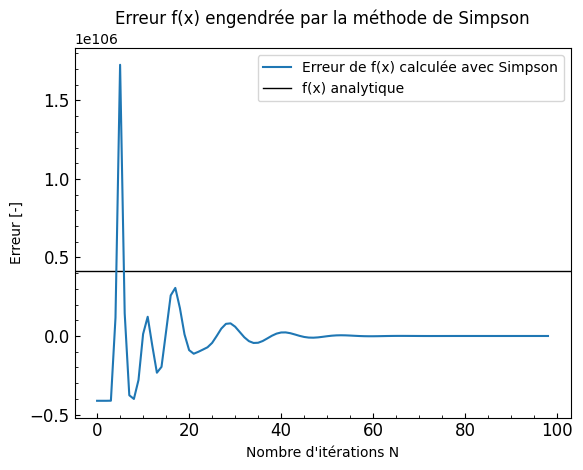

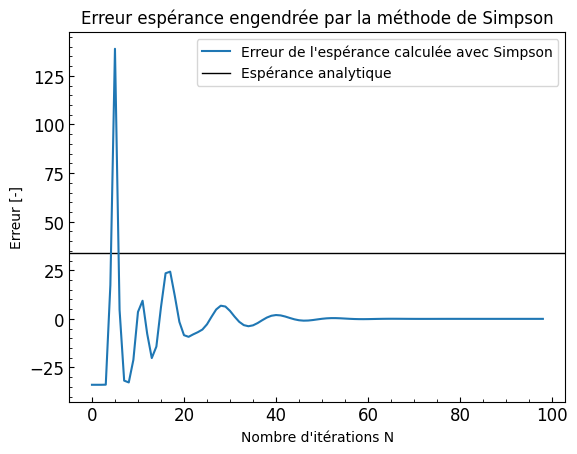

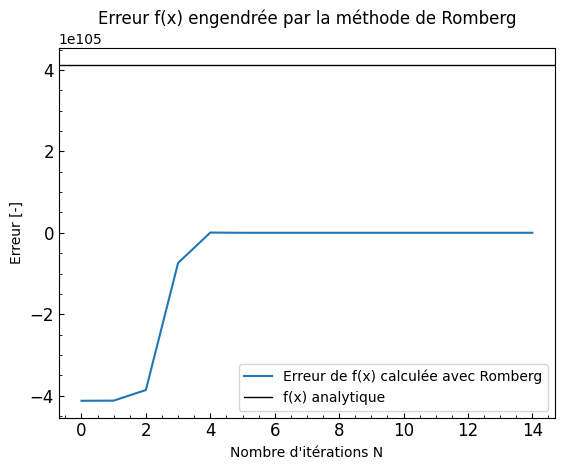

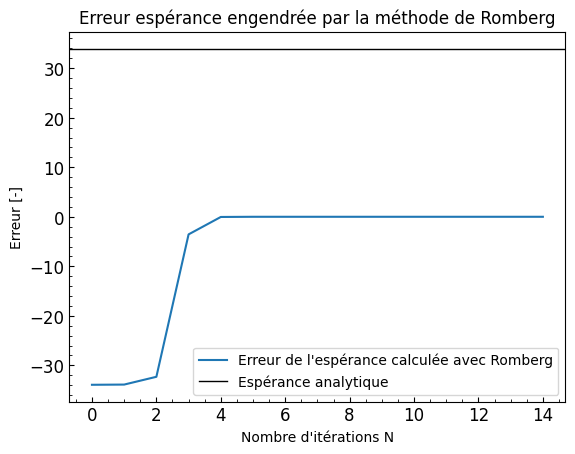

In [93]:
dataset=data2
delais=delay(dataset)
sum_x=sum(delais) #Sommation des x_i
T=len(delais)
f_analy =math.factorial(alpha+T-1)*(beta**alpha)/((math.factorial(alpha-1)))*1/(beta+sum_x)**(alpha+T)
lambda_analy=(alpha+T)/(beta+sum_x)

ferr_simpson = [ ]
lambda_simp = [ ]
for i in range(1, 100):
  ferr_simpson.append((simpson(f, 0, 200, i))-f_analy)
  lambda_simp.append(simpson(lambda_ideal, 0, 200, i)-lambda_analy)
N_simpson= [i for i in range(len(lambda_simp))]


Rfx=romberg(f, 0, 200, 15, 10E5)
Rlambda=romberg(lambda_ideal,0, 200, 15, 1E-10)
ferr_romberg = [ ]
lambda_rom = [ ]
for i in range(15):
    ferr_romberg.append(Rfx[i,0]-f_analy)
    lambda_rom.append(Rlambda[i,0]-lambda_analy)
N_romberg= [i for i in range(len(lambda_rom))]


plt.figure()
plt.minorticks_on()
plt.tick_params(axis="both",direction="in",labelsize='large',which='both',color='black')
plt.title("Erreur f(x) engendrée par la méthode de Simpson")
plt.ylabel("Erreur [-]")
plt.xlabel("Nombre d'itérations N")
plt.plot(N_simpson, ferr_simpson, label="Erreur de f(x) calculée avec Simpson")
plt.axhline(y=f_analy, xmin=0, xmax=100, c="black", linewidth=1, zorder=0, label="f(x) analytique")
plt.legend()
plt.plot()
plt.show()


plt.figure()
plt.minorticks_on()
plt.tick_params(axis="both",direction="in",labelsize='large',which='both',color='black')
plt.title("Erreur espérance engendrée par la méthode de Simpson")
plt.ylabel("Erreur [-]")
plt.xlabel("Nombre d'itérations N")
plt.plot(N_simpson, lambda_simp, label="Erreur de l'espérance calculée avec Simpson")
plt.axhline(y=lambda_analy, xmin=0, xmax=100, c="black", linewidth=1, zorder=0, label="Espérance analytique")
plt.legend()
plt.plot()
plt.show()

plt.figure()
plt.minorticks_on()
plt.tick_params(axis="both",direction="in",labelsize='large',which='both',color='black')
plt.title("Erreur f(x) engendrée par la méthode de Romberg")
plt.ylabel("Erreur [-]")
plt.xlabel("Nombre d'itérations N")
plt.plot(N_romberg, ferr_romberg, label="Erreur de f(x) calculée avec Romberg")
plt.axhline(y=f_analy, xmin=0, xmax=100, c="black", linewidth=1, zorder=0, label="f(x) analytique")
plt.legend()
plt.plot()
plt.show()


plt.figure()
plt.minorticks_on()
plt.tick_params(axis="both",direction="in",labelsize='large',which='both',color='black')
plt.title("Erreur espérance engendrée par la méthode de Romberg")
plt.ylabel("Erreur [-]")
plt.xlabel("Nombre d'itérations N")
plt.plot(N_romberg, lambda_rom, label="Erreur de l'espérance calculée avec Romberg")
plt.axhline(y=lambda_analy, xmin=0, xmax=100, c="black", linewidth=1, zorder=0, label="Espérance analytique")
plt.legend()
plt.plot()
plt.show()


Question 6: La taille considérable de la valeur de f(x) (allant jusqu'a 10E48 dans ce cas-ci), pose surtout problème lors du calcul de l'erreur. Dans le calcul avec l'intégral de Romberg par exemple, le temps d'itérations pour obtenir une erreur de moins de 10E-5 dans f(x) est colossale. Nous devons donc nous contenter d'une grande erreur mais qui est petite par rapport a la valeur de f(x). 
